# Stellar fractional abundance of Hydrogen

Figure 8.3 from *Stellar Structure & Evolution* by Pinsonneault & Ryden, Cambridge University Press.

Plot the fractional abundance of hydrogen, $X_H$ as a function of M$_r$ for a 1 and 4M$_\odot$ star from the 
ZAMS to near the time of core hydrogen exhaustion.

This works with data created using MESA stellar models, then scraped to get just the (m,xH) data we need to
plot to make handling this easier (kB instead of MB of data).

In [6]:
%matplotlib inline

import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [7]:
plotFile = 'Fig8_3.png' 

# graphic aspect ratio = width/height

aspect = 2.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 7
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Data

### 1M$_\odot$ Star

Hydrogen mass fraction X$_H$ as a function of m/M$_\star$ for 1M$_\odot$ star with a radiative core.  Times are ZAMS, 1Gyr, then 2Gyr to 10Gyr in 2Gyr steps (7 abundance profiles).

In [8]:
fileRoot = 'CoreAbund/abund_1M'
ages1Msun = ['zams','1Gyr','2Gyr','4Gyr','6Gyr','8Gyr','10Gyr']

Mr_1Msun = {}
xH_1Msun = {}
for age in ages1Msun:
    dataFile = f'{fileRoot}_{age}.txt'
    data = pd.read_csv(dataFile,sep=r'\s+')
    Mr_1Msun[age] = np.array(data['Mr'])
    xH_1Msun[age] = np.array(data['xH'])

### 4M$_\odot$ Star

Hydrogen mass fraction X$_H$ as a function of m/M$_\star$ for 4M$_\odot$ star with a fully convective core on the main sequence.  Times are ZAMS, then 25Myr to 150Myr in 25Myr steps (7 abundance profiles).

In [9]:
fileRoot = 'CoreAbund/abund_4M'
ages4Msun = ['zams','25Myr','50Myr','75Myr','100Myr','125Myr','150Myr']

Mr_4Msun = {}
xH_4Msun = {}

for age in ages4Msun:
    dataFile = f'{fileRoot}_{age}.txt'
    data = pd.read_csv(dataFile,sep=r'\s+')
    Mr_4Msun[age] = np.array(data['Mr'])
    xH_4Msun[age] = np.array(data['xH'])

## Figure 8.3

Two-panel, side-by-side, hydrogen mass fraction x(H) versus mass fracxtion M/M<sub>star</sub>, for 
 * Left: M<sub>star</sub> = 1 M<sub>sun</sub>
 * Right: M<sub>star</sub> = 4 M<sub>sun</sub>
 

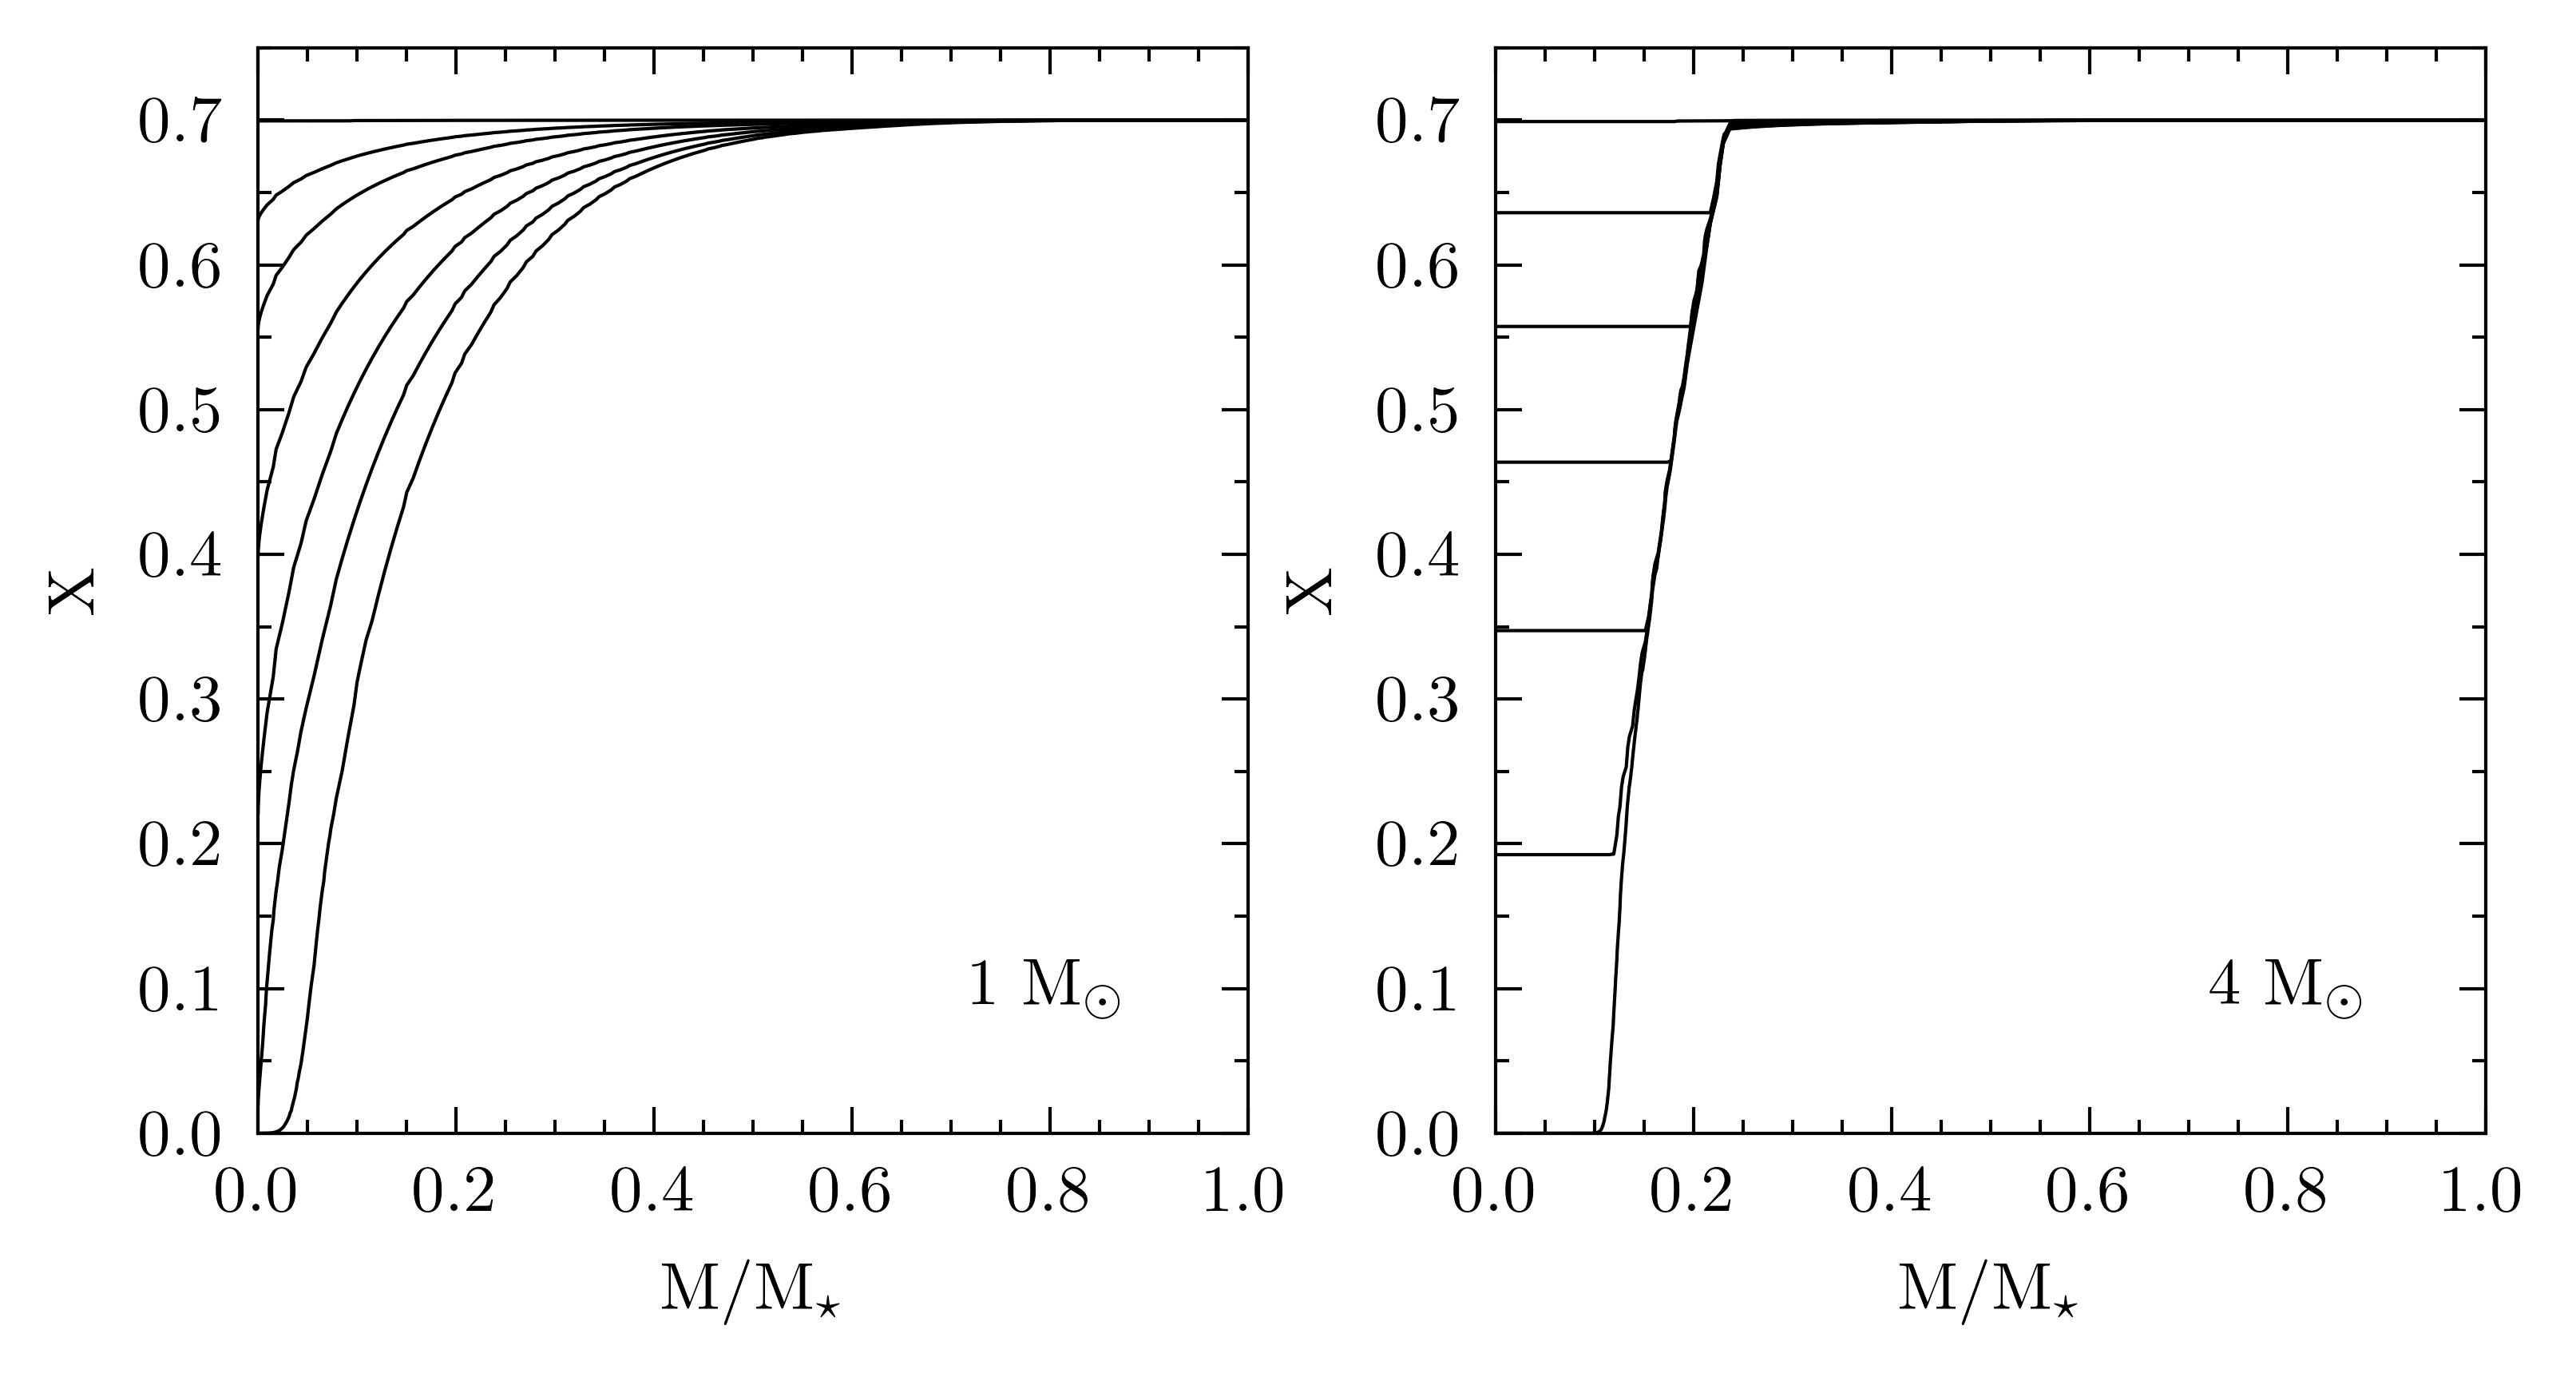

In [10]:
fig,(ax1,ax4) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
    
fig.subplots_adjust(wspace=0.25, hspace=0)

# Axis Limits

mMin = 0.0
mMax = 1.0
xMin = 0.0
xMax = 0.75

# 1 Msun

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax1.set_xlim(mMin,mMax)
ax1.xaxis.set_major_locator(MultipleLocator(0.2))
ax1.xaxis.set_minor_locator(MultipleLocator(0.05))
ax1.set_xlabel(r'M/M$_\star$',fontsize=axisFontSize)
ax1.set_ylim(xMin,xMax)
ax1.yaxis.set_major_locator(MultipleLocator(0.1))
ax1.yaxis.set_minor_locator(MultipleLocator(0.05))
ax1.set_ylabel(r'X',fontsize=axisFontSize)

for age in ages1Msun:
    ax1.plot(Mr_1Msun[age],xH_1Msun[age],'-',color='black',lw=0.5,zorder=10)

ax1.text(0.8,0.1,f'1 M$_\odot$',fontsize=axisFontSize,va='center',ha='center')

# 4 Msun

ax4.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax4.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax4.set_xlim(mMin,mMax)
ax4.xaxis.set_major_locator(MultipleLocator(0.2))
ax4.xaxis.set_minor_locator(MultipleLocator(0.05))
ax4.set_xlabel(r'M/M$_\star$',fontsize=axisFontSize)
ax4.set_ylim(xMin,xMax)
ax4.yaxis.set_major_locator(MultipleLocator(0.1))
ax4.yaxis.set_minor_locator(MultipleLocator(0.05))
ax4.set_ylabel(r'X',fontsize=axisFontSize)

for age in ages4Msun:
    ax4.plot(Mr_4Msun[age],xH_4Msun[age],'-',color='black',lw=0.5,zorder=10)

ax4.text(0.8,0.1,f'4 M$_\odot$',fontsize=axisFontSize,va='center',ha='center')
    
plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')